In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root = './dataset', 
                            train=True, 
                            download = True, 
                            transform = transform)

data_loader = torch.utils.data.DataLoader(dataset = mnist_data,
                                        batch_size = 64,
                                        shuffle = True)

In [4]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [5]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            # batch_size, 28*28
            nn.Linear(28*28, 128), 
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3),    # batch_size, 3
        )
        
        self.decoder = nn.Sequential(
            # batch_size, 3
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28), # batch_size, 28*28
            nn.Sigmoid()          # to get the images values between 0 and 1
        )

    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# If the transform is different and the values of the images are between -1 and 1
# we have to use another activation funcion (Tanh)

In [6]:
class Autoencoder_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            # batch_size, 1, 28, 28
            nn.Conv2d(1, 16, 3, stride = 2, padding = 1),   # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride = 2, padding = 1),   # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7),                            # N, 64, 1, 1
        )
        
        self.decoder = nn.Sequential(
            # N, 64, 1, 1
            nn.ConvTranspose2d(64, 32, 7),                  # N, 32, 7, 7 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, 
                                stride = 2, 
                                padding = 1,
                                output_padding = 1),       # N, 16, 13, 13
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, 
                                stride = 2, 
                                padding = 1,
                                output_padding = 1),       # N, 1, 28, 28
            nn.Sigmoid()          # to get the images values between 0 and 1
        )

    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
model = Autoencoder_CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                            lr = 1e-3, 
                            weight_decay = 1e-5)

In [8]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss:0.0092
Epoch: 2, Loss:0.0055
Epoch: 3, Loss:0.0044
Epoch: 4, Loss:0.0041
Epoch: 5, Loss:0.0033
Epoch: 6, Loss:0.0032
Epoch: 7, Loss:0.0028
Epoch: 8, Loss:0.0025
Epoch: 9, Loss:0.0028
Epoch: 10, Loss:0.0033


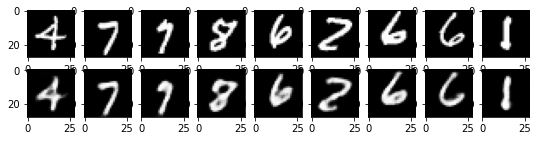

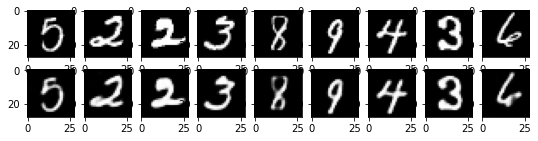

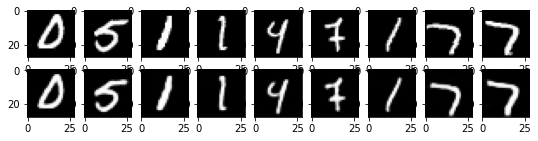

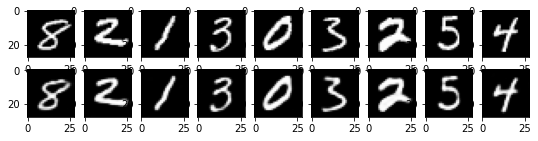

In [9]:
for k in range(0, num_epochs, 3):
    plt.figure(figsize = (9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i>= 9: break
        plt.subplot(2,9,i+1)

        plt.imshow(item[0])
    
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2,9,9+i+1)

        plt.imshow(item[0])
    

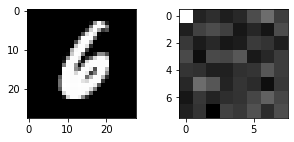

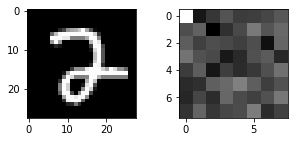

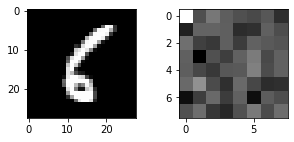

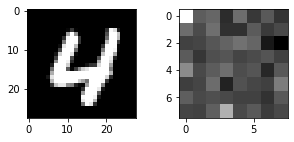

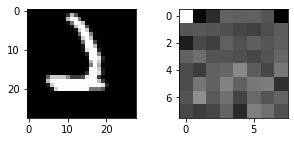

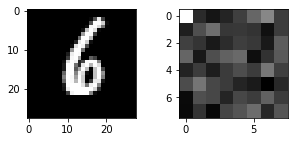

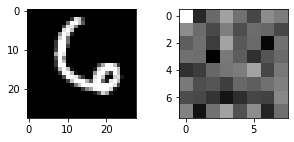

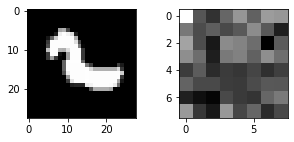

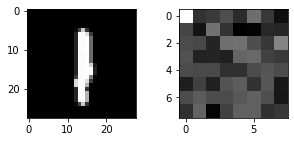

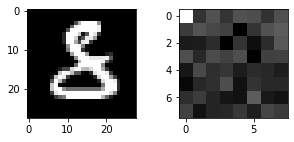

In [11]:
for k in range(0,num_epochs):
    plt.figure(figsize = (5,2))
    plt.gray()
    for (img, _) in data_loader:
        encoding = model.encoder(img)

        for i in range(0,20):
            plt.subplot(1,2,1)
            plt.imshow(img[i][0].detach().numpy())

            plt.subplot(1,2,2)
            plt.imshow(np.reshape(encoding[i].detach().numpy(),(8,8)))
        
        break
    # imgs = outputs[k][1].detach().numpy
    

    # for i, item in enumerate(imgs):
    #     if i>= 9: break
    #     plt.subplot(2,9,i+1)

    #     plt.imshow(item[0])
    
    # for i, item in enumerate(encoding):
    #     if i >= 9: break
    #     plt.subplot(2,9,9+i+1)

    #     plt.imshow(item[0])